# Install and imports


In [3]:
#!pip install git+https://github.com/GabrieleSgroi/image_composition_diffusion

  Cloning https://github.com/GabrieleSgroi/image_composition_diffusion to /tmp/pip-req-build-g8i21hac
  Running command git clone --filter=blob:none --quiet https://github.com/GabrieleSgroi/image_composition_diffusion /tmp/pip-req-build-g8i21hac
  Resolved https://github.com/GabrieleSgroi/image_composition_diffusion to commit 0bf1115660cfa2e9f8f05b903d7504a343d991e2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/

In [1]:
from diffusion_composition.pipeline import DiffusionCompositionPipeline
from diffusion_composition.prompting import BoundingBoxPromptSetter
from diffusion_composition.utils import load_models, upscale_image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [30]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2")

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

# Download the models and initialize the pipeline

In [31]:
models = load_models()


comp = DiffusionCompositionPipeline(vae=models['vae'],
                                   unet=models['unet'],
                                   scheduler=models['scheduler'])

# Set the prompts

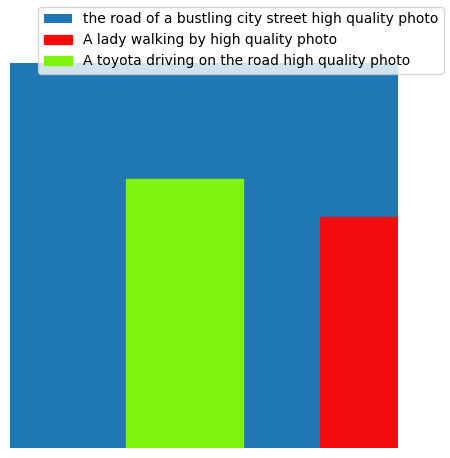

In [56]:
prompt_setter = BoundingBoxPromptSetter(text_encoder=models['text_encoder'], tokenizer=models['tokenizer'])

prompt_setter.set_background_prompt("the road of a bustling city street", guidance_scale=7.5)

#Prompts set first are put in the foreground in case of intersections
prompt_setter.add_local_prompt("A toyota driving on the road",
                               top_margin=0.3,
                               bottom_margin=0.,
                               left_margin=0.3,
                               right_margin=0.4)


prompt_setter.add_local_prompt("A lady walking by",
                               top_margin=0.4,
                               bottom_margin=0.,
                               left_margin=0.8,
                               right_margin=0.)


prompt_setter.add_to_all_prompts("high quality photo")
fig = prompt_setter.draw_bboxes('bboxes.png')
plt.show(fig)

# Generate the image

100%|██████████| 50/50 [00:18<00:00,  2.67it/s]


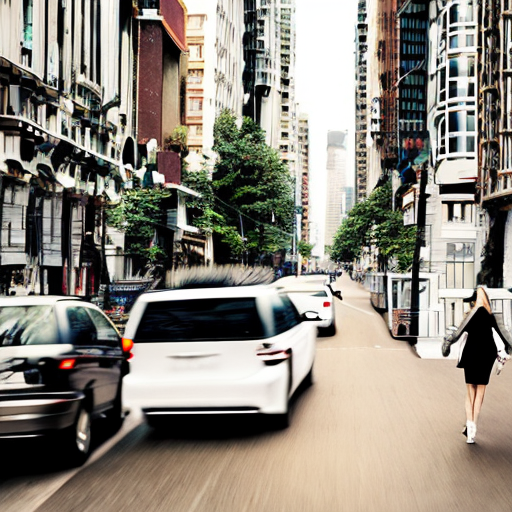

In [57]:
img = comp(prompt_setter=prompt_setter,
           num_inference_steps=50,
           bootstrap_steps=5,
           device='cuda',
           batch_size=6)
img = Image.fromarray((img * 255).round().astype(np.uint8))
img.save("generated_image.png")
display(img)

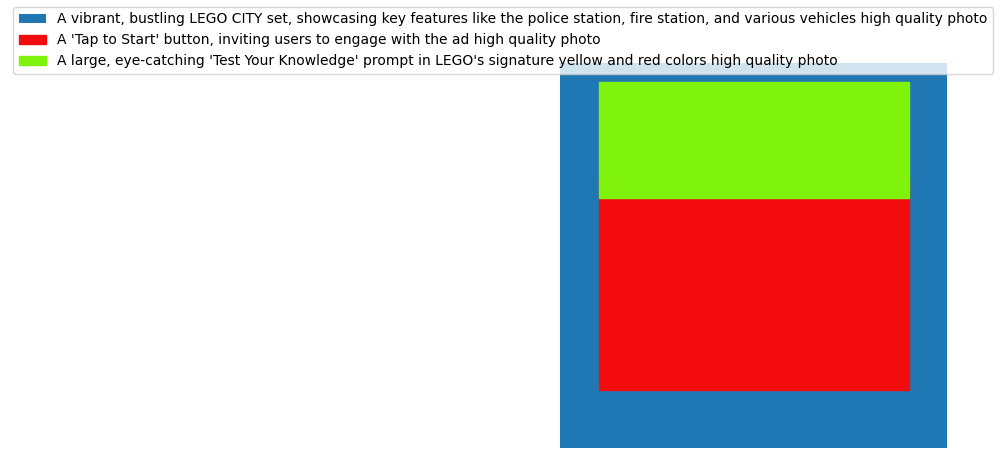

In [28]:
#from matplotlib import pyplot as plt
#from text2scene.prompt_setting import BoundingBoxPromptSetter
# Create a BoundingBoxPromptSetter
prompt_setter = BoundingBoxPromptSetter(text_encoder=models['text_encoder'], tokenizer=models['tokenizer'])

# Set the background prompt
prompt_setter.set_background_prompt("A vibrant, bustling LEGO CITY set, showcasing key features like the police station, fire station, and various vehicles", guidance_scale=7.5)

# Add the 'Test Your Knowledge' prompt with adjusted margins for visibility
prompt_setter.add_local_prompt("A large, eye-catching 'Test Your Knowledge' prompt in LEGO's signature yellow and red colors",
                               top_margin=0.05,
                               bottom_margin=0.65,
                               left_margin=0.1,
                               right_margin=0.1)

# Add the 'Tap to Start' button
prompt_setter.add_local_prompt("A 'Tap to Start' button, inviting users to engage with the ad",
                               top_margin=0.30,
                               bottom_margin=0.15,
                               left_margin=0.1,
                               right_margin=0.1)

# Add a common prompt to all, in this case, "high quality photo"
prompt_setter.add_to_all_prompts("high quality photo")

# Draw bounding boxes and show the figure
fig = prompt_setter.draw_bboxes('bboxes.png')
plt.show(fig)


100%|██████████| 50/50 [00:18<00:00,  2.66it/s]


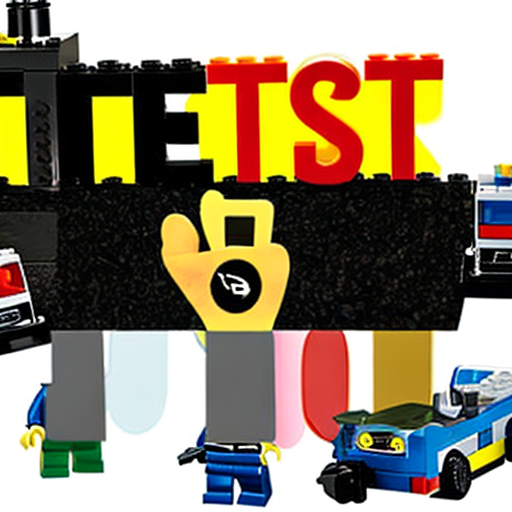

In [29]:
img = comp(prompt_setter=prompt_setter,
           num_inference_steps=50,
           bootstrap_steps=5,
           device='cuda',
           batch_size=6)
img = Image.fromarray((img * 255).round().astype(np.uint8))
img.save("generated_image.png")
display(img)